In [ ]:
# Meeting notes
# risk - 33%
# profit - 77%
# can look at multiple pairs if needed

In [1]:
# imports 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use('fivethirtyeight')
import math
import seaborn as sns
from datetime import datetime

In [2]:
# data import 
df = pd.read_excel('Time Series Data.xlsx', index_col = 'Day')
df.head()

,Series 1,Series 2,Series 3,Series 4,Series 5,Series 6,Series 7,Series 8,Series 9,Series 10,...,Series 20,Series 21,Series 22,Series 23,Series 24,Series 25,Series 26,Series 27,Series 28,Series 29
Day,,,,,,,,,,,,,,,,,,,,,
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,100.172920,100.589993,103.823464,98.644063,99.750482,106.614321,101.767999,100.732626,99.952576,100.227093,...,101.568951,99.730607,99.673906,99.409461,99.113705,100.012563,100.311565,99.887188,96.556886,97.922078
2,98.579911,98.767737,107.058757,97.936942,99.220660,110.602917,100.681776,100.383846,99.617067,100.246064,...,106.193229,101.541426,99.977798,99.577298,99.783831,99.682467,100.366287,99.902872,95.608782,100.000000
3,98.397809,97.087379,107.352843,100.000000,99.251805,113.424191,102.651998,101.569981,98.659381,101.230321,...,106.936416,100.938414,99.278429,99.055138,100.875486,99.637414,100.767880,100.216365,95.109780,100.000000
4,99.051233,99.716206,105.587978,99.703996,99.407530,113.715275,100.710685,101.081407,99.760755,101.040888,...,107.018993,101.448655,99.979185,99.602163,100.162127,100.379047,101.058262,100.323414,90.469062,99.480519


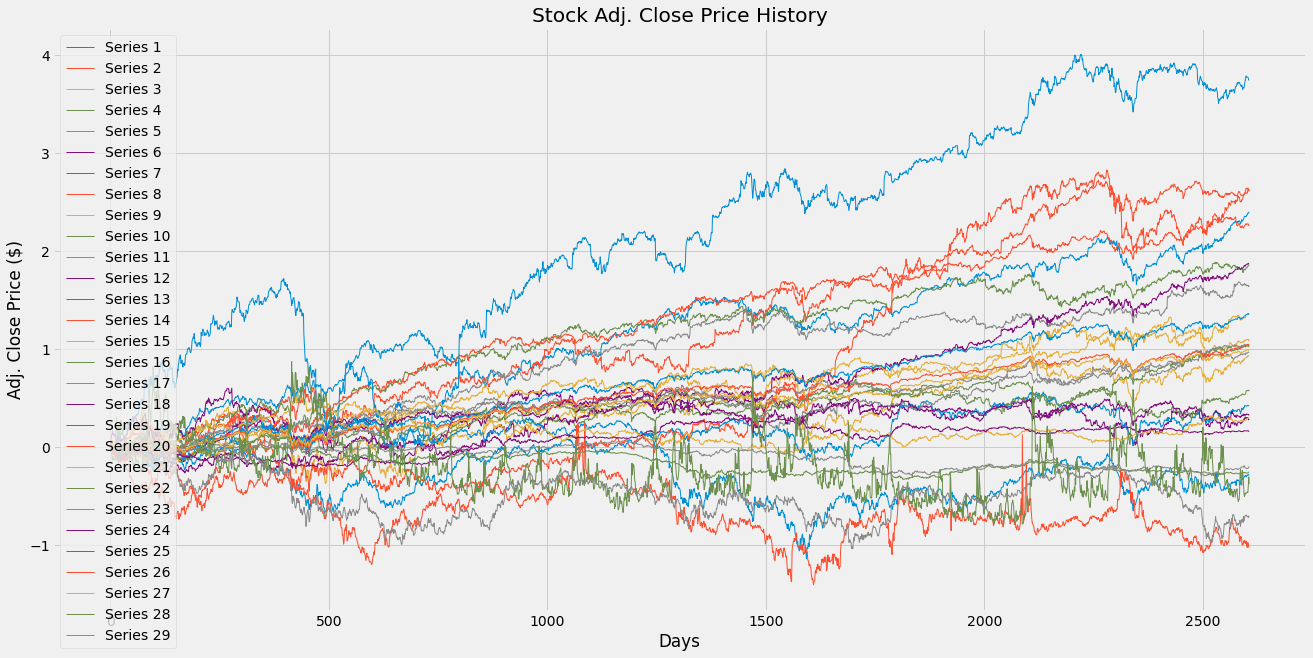

In [3]:
#Visualise the data
plt.figure(figsize=(20, 10))
plt.plot(np.log(df)-np.log(100), linewidth = 1)
plt.title('Stock Adj. Close Price History')
plt.xlabel('Days')
plt.ylabel('Adj. Close Price ($)')
plt.legend(df, loc='upper left')
plt.show()


,Series 1,Series 2,Series 3,Series 4,Series 5,Series 6,Series 7,Series 8,Series 9,Series 10,...,Series 20,Series 21,Series 22,Series 23,Series 24,Series 25,Series 26,Series 27,Series 28,Series 29
Series 1,NaN,0.940150,NaN,0.912122,NaN,NaN,NaN,0.964281,0.959751,NaN,...,NaN,NaN,NaN,NaN,NaN,0.972865,0.958556,0.966878,NaN,NaN
Series 2,0.940150,NaN,NaN,NaN,NaN,NaN,NaN,0.951644,0.950948,NaN,...,NaN,NaN,NaN,NaN,NaN,0.952508,0.923071,0.948235,NaN,NaN
Series 3,NaN,NaN,NaN,NaN,NaN,NaN,0.944275,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.916312,0.914526,0.919681,NaN,NaN
Series 4,0.912122,NaN,NaN,NaN,0.970505,NaN,NaN,0.958921,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.957274,0.974444,0.955998,NaN,NaN
Series 5,NaN,NaN,NaN,0.970505,NaN,NaN,NaN,0.939942,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.940522,0.958400,0.928581,NaN,NaN
Series 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Series 7,NaN,NaN,0.944275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Series 8,0.964281,0.951644,NaN,0.958921,0.939942,NaN,NaN,NaN,0.961210,NaN,...,NaN,NaN,NaN,NaN,NaN,0.989185,0.984121,0.984428,NaN,NaN
Series 9,0.959751,0.950948,NaN,NaN,NaN,NaN,NaN,0.961210,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.970815,0.955839,0.966816,NaN,NaN
Series 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


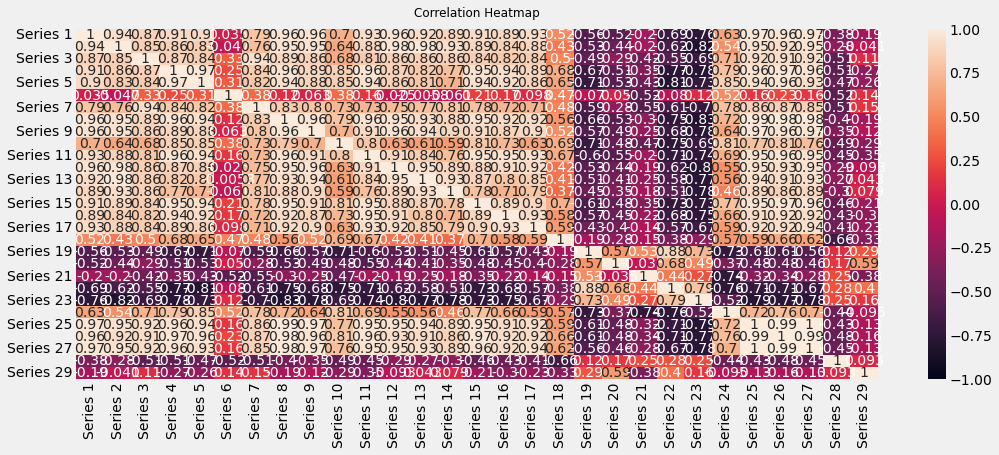

In [4]:
# finding correlations
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# finding largest correlations
cor = df.corr()
cor[(cor > 0.9) & (cor < 1)]


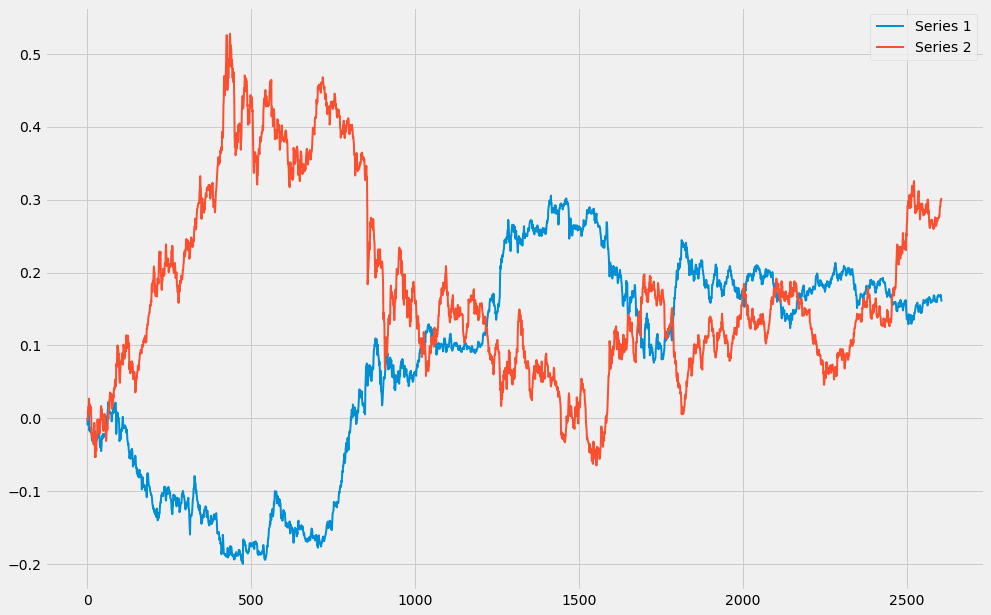

In [5]:
# potential pair
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(10)
ax.plot(np.log(df[['Series 24', 'Series 21']])-np.log(100), linewidth = 2)
ax.legend(df)
plt.show()

In [46]:
# moving average strategy
# ma function

def MA(data, window, lag): 
    # generating simple moving average
    
    # data - is the series to generate signals for
    # window - is the window used to generate the average
    # lag - is how far % past the average before a signal is generated
    
    SMA = data.rolling(window = window).mean()
    
    # generating signals
    sigPriceBuy = []
    sigPriceSell = []
      
    #flag = 1: long position, flag = 0: short position, flag = -1: no position
    flag = -1

    for i in range(len(data)):
        if i == len(data)-1:
            if flag == 1:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data[i])
                flag = 0
            else: 
                sigPriceBuy.append(data[i])
                sigPriceSell.append(np.nan)
                flag = 0
        elif SMA[i] < data[i]*(1-lag/100):
            if flag != 1:
                sigPriceBuy.append(data[i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif SMA[i] > data[i]*(1+lag/100):
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data[i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else: 
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)

    return (sigPriceBuy, sigPriceSell)
    

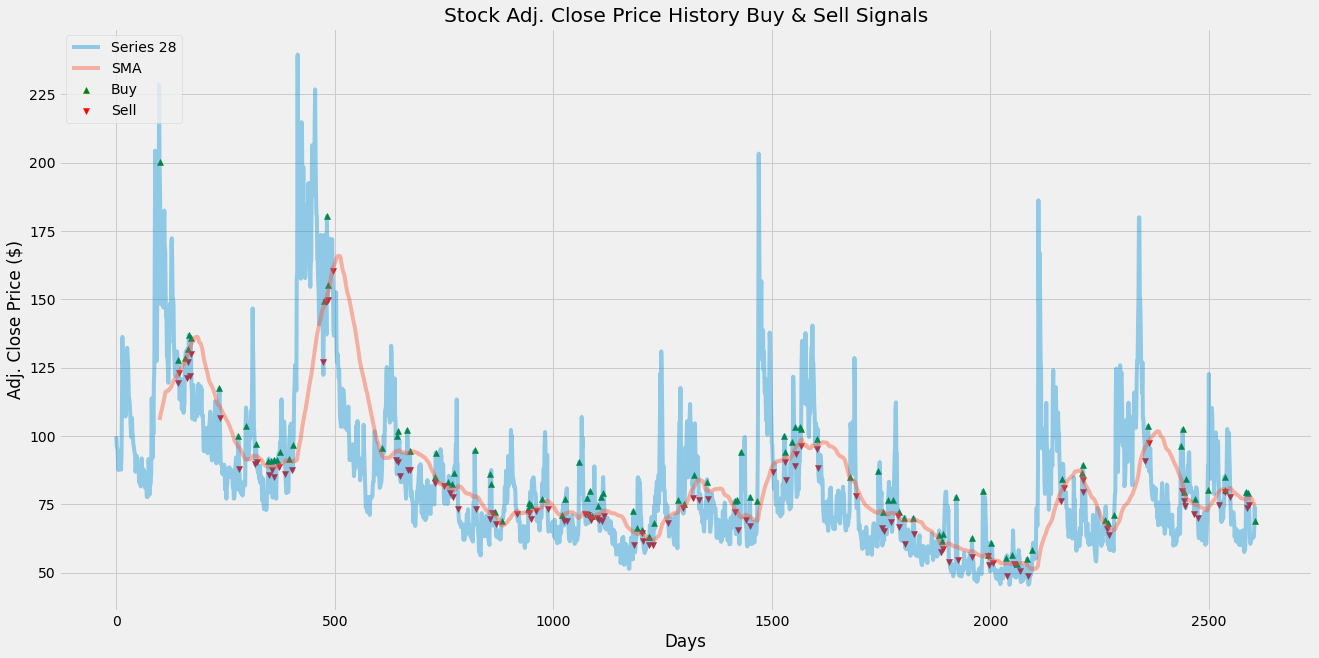

In [228]:
# To test, change window and the series used

# =========================================
# variables
window = 100
series = 'Series 28'
lag = 0
# =========================================

#Store the buy and sell data into a variable
buy_sell_data = MA(df[series], window, lag)

# visualise test
plt.figure(figsize=(20, 10))
plt.plot(df[series], label=series, alpha=0.4)
plt.plot(df[series].rolling(window=window).mean(), label='SMA', alpha=0.4)
plt.scatter(df.index, buy_sell_data[0], label='Buy', marker='^', color='green')
plt.scatter(df.index, buy_sell_data[1], label='Sell', marker='v', color='red')
plt.title('Stock Adj. Close Price History Buy & Sell Signals')
plt.xlabel('Days')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left')
plt.show()



In [224]:
#Calculating returns

def Backtest(data, buy_sell):
    
    profit = np.nansum(buy_sell[1]) - np.nansum(buy_sell[0])
    data_profit = data.iloc[-1] - data[0]
    rel_profit = profit/data_profit
    abs_profit = profit
    
    return rel_profit, abs_profit

In [225]:
# profit test 
p = Backtest(df[series], MA(df[series], window, lag))
p


(28.091054313098997, -877.4950099800408)

In [214]:
# Testing all date

# variables
lag = 0
upper_window = 300
lower_window = 10

profit_df = pd.DataFrame(columns = df.columns)

# iterating over different windows and series to find matrix of returns
for i in np.linspace(lower_window,upper_window,int(upper_window/10)):
    
    profit = []
    
    for column in df:
        
        profit.append(Backtest(df[column], MA(df[column], int(i), lag)))
    
    profits = pd.DataFrame(columns = df.columns).transpose()
    profits[i] = profit
    profits = profits.transpose()
    
    profit_df = pd.concat([profit_df, profits])
    

In [219]:
# finding best returns
profit_df.style.background_gradient(cmap='Greens')


,Series 1,Series 2,Series 3,Series 4,Series 5,Series 6,Series 7,Series 8,Series 9,Series 10,Series 11,Series 12,Series 13,Series 14,Series 15,Series 16,Series 17,Series 18,Series 19,Series 20,Series 21,Series 22,Series 23,Series 24,Series 25,Series 26,Series 27,Series 28,Series 29
10.000000,0.718210,0.633966,1.406186,0.168910,-0.619029,-2.534567,0.051313,-0.291936,0.943992,-0.553842,0.676292,0.150988,-0.163426,-0.075222,-1.047227,-0.675085,-0.651466,-2.043360,-3.481627,-0.168952,3.918193,-3.896682,0.720182,-0.002798,0.864066,1.003127,-0.318067,19.881789,0.062176
20.000000,0.932867,0.621346,1.319614,0.565913,-0.546745,-0.290465,2.522667,0.637380,0.904845,-0.603838,0.534574,0.443764,0.730993,0.817407,0.867029,-1.314119,-0.671065,-1.734819,-3.017638,0.110737,3.740257,-3.504479,-4.254939,-1.035255,0.815760,0.924563,1.080730,25.648562,-1.051813
30.000000,0.944315,0.749064,1.187460,0.746873,-0.149629,3.921974,3.315095,-0.438862,0.690841,0.805962,0.605507,0.454502,1.053375,0.638874,0.925119,0.306949,1.056317,2.969559,-3.312592,-0.048124,3.838532,-3.665605,-4.573347,-0.599515,0.806006,1.038369,1.040769,22.452077,-1.310881
40.000000,0.637387,0.689581,0.682747,0.486574,-0.393185,0.318862,3.019561,-0.466041,0.992575,1.050633,0.720253,0.437195,0.805242,0.808076,0.912917,0.488541,0.465274,2.168269,1.529152,0.207762,0.658450,-3.652933,-4.564477,-1.101971,0.558085,1.004228,1.059273,20.145367,-1.367876
50.000000,0.677278,0.738328,0.498857,0.456928,0.727896,-0.480630,1.151426,-0.354361,0.816345,1.204067,0.735315,0.384441,0.639179,0.852820,0.843068,0.382371,0.660736,0.332558,1.100931,0.579819,3.607304,-3.812873,-4.739584,-6.225953,0.488264,0.329137,0.481432,19.776358,0.253886
60.000000,0.745965,0.658599,0.248377,0.377105,0.534716,0.014925,0.551215,-0.384332,0.712839,0.178960,0.193342,0.383908,0.890591,0.701479,0.878160,0.448048,0.650161,0.033557,0.368447,0.693661,3.410451,-3.389893,-4.441955,0.136293,0.438845,0.233431,0.348961,18.329073,0.461140
70.000000,0.744709,0.656616,0.328684,0.299076,0.653835,-0.253175,0.350343,-0.432931,0.492046,1.349403,0.118823,0.502227,0.991341,0.891472,1.035258,0.461496,0.719211,0.095163,1.427732,0.524450,0.658525,-3.684178,-5.267767,0.707579,0.359432,0.298033,0.179541,17.952077,0.202073
80.000000,0.734675,0.765739,0.242258,0.230864,0.741090,-0.595355,2.445183,-0.430329,0.501552,-0.039289,0.765168,0.448568,0.916953,0.975611,1.083427,0.506878,0.643162,-0.469967,1.469378,0.420440,0.686232,-3.470831,-5.350355,0.967854,0.476735,0.245206,0.111574,20.301917,-0.025907
90.000000,0.809658,0.734116,0.249391,0.262868,0.729041,3.668390,2.177947,-0.431904,0.866168,1.315090,0.787015,0.611162,0.740969,0.995593,1.016800,1.177718,1.361778,1.749937,-2.484566,0.570763,0.603945,-3.100883,-5.401986,1.169309,0.904165,0.842763,0.816426,27.369010,-2.181347
100.000000,0.793237,0.786189,0.982933,0.561402,0.931615,3.547904,2.481035,-0.486784,0.791170,0.113661,0.861795,0.651338,0.598198,0.948452,0.919813,1.226627,1.448063,1.787952,-1.461049,0.670893,0.495542,-3.152886,-5.196911,6.874650,0.865782,0.754637,0.854967,28.091054,-1.984456


In [159]:
df.columns

Index(['Series 1', 'Series 2', 'Series 3', 'Series 4', 'Series 5', 'Series 6',
       'Series 7', 'Series 8', 'Series 9', 'Series 10', 'Series 11',
       'Series 12', 'Series 13', 'Series 14', 'Series 15', 'Series 16',
       'Series 17', 'Series 18', 'Series 19', 'Series 20', 'Series 21',
       'Series 22', 'Series 23', 'Series 24', 'Series 25', 'Series 26',
       'Series 27', 'Series 28', 'Series 29'],
      dtype='object')